Like the previous notebook, we split our data into the same train and validation subset.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
train_df = pd.read_csv("../data/Titanic/train_processed.csv")

In [14]:
y = train_df['Survived']
x = train_df.drop(['Survived'], axis=1)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
??RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Source:        
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    The sub-sample size is controlled with the `max_samples` parameter if
    `bootstrap=True` (default), otherwise the whole dataset is used to build
    each tree.

    Read more in the :ref:`User Guide <forest>`.

    P

In [18]:
model = RandomForestClassifier(n_estimators=10,
                               max_samples = 0.7,
                               max_features= 0.8,
                               max_depth=3,
                               min_samples_split=2,
                               random_state=0)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=0.8, max_samples=0.7,
                       n_estimators=10, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [21]:
y_pred = model.predict(X_valid)
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(precision, recall, f1)

0.8103448275862069 0.6911764705882353 0.746031746031746


Quiz: can you try using grid search to find the best n_estimator, max_samples, and max_features?

Hint: refer to the previous nb to find how to do grid search

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [5, 10, 15], 'max_features': [0.6, 0.8],
              'max_samples': [0.7, 0.9], 'max_depth': [3, 5, 7], 'min_samples_split':[1, 2,3]}

model = RandomForestClassifier(random_state=125)

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, scoring='f1')

# Fit the grid search to the data
grid_search.fit(x, y)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 7, 'max_features': 0.6, 'max_samples': 0.9, 'min_samples_split': 3, 'n_estimators': 10}


In [23]:
model = RandomForestClassifier(**grid_search.best_params_)

In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(precision, recall, f1)


0.9122807017543859 0.7647058823529411 0.8319999999999999


In [25]:
model.feature_importances_

array([0.13576327, 0.15115305, 0.03808415, 0.05235727, 0.22139248,
       0.34980156, 0.01701962, 0.00357967, 0.03084891])

In [26]:
feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

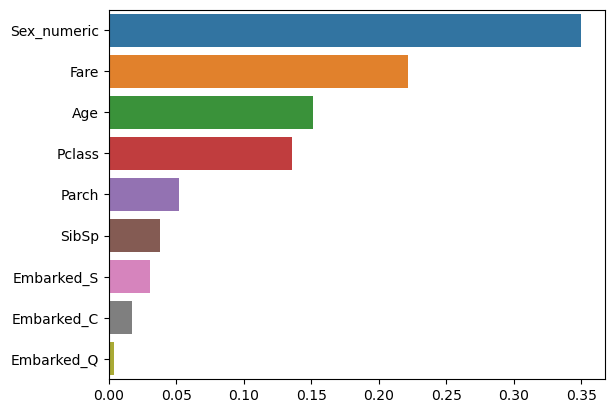

In [28]:
sns.barplot(x=feature_imp, y=feature_imp.index)

In [29]:
feature_imp.sum()

1.0